# Load DFT data into a more manageable format

#### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ase
from ase.db import connect
import sys
import os

In [2]:
# Attach Jacks formic acid data
formic_acid_data_path = "../Experiments/AgAuCuPdPt_data/1_databases/relaxed/"
#sys.path.append()

In [3]:
os.listdir(formic_acid_data_path)

['single_element_H_out.db',
 'HCOOH_O_adsorbed_out.db',
 'H_out.db',
 '.DS_Store',
 'COOH_H_on_O_OO_adsorbed_out.db',
 'single_element_COOH_COH_adsorbed_out.db',
 'COOH_O_adsorbed_out.db',
 'CO_out.db',
 'single_element_COOH_H_CO_adsorbed_out.db',
 'single_element_COOH_C_adsorbed_out.db',
 'single_element_COOH_CO_adsorbed_out.db',
 'single_element_CO_out.db',
 'split_databases.py',
 'single_elements_COOH_CO_adsorbed_out.db',
 'molecules_out.db',
 'single_element_COOH_H_on_O_OO_adsorbed_out.db',
 'single_element_slabs_out.db',
 'single_elements_COOH_COH_adsorbed_out.db',
 'single_element_COOH_H_CO_and_H2O_like_out.db',
 'single_element_HCOOH_O_adsorbed_out.db',
 'slabs_out.db',
 'single_element_COOH_O_adsorbed_out.db',
 'single_element_COOH_H_COH_adsorbed_out.db',
 'COOH_CO_adsorbed_out.db',
 'COOH_H_on_C_OO_adsorbed_out.db',
 'COOH_C_adsorbed_out.db',
 'COOH_COH_adsorbed_out.db']

### Sort through data

In [4]:
single_element_dbs = []
HEA_dbs = []

for filename in os.listdir(formic_acid_data_path):
    if filename[-3:] == ".db":
        if filename[0:14] == "single_element":
            single_element_dbs.append(filename)
        if filename[0] == "H" or filename[0] == "C":
            HEA_dbs.append(filename)

In [5]:
os.listdir(formic_acid_data_path)

['single_element_H_out.db',
 'HCOOH_O_adsorbed_out.db',
 'H_out.db',
 '.DS_Store',
 'COOH_H_on_O_OO_adsorbed_out.db',
 'single_element_COOH_COH_adsorbed_out.db',
 'COOH_O_adsorbed_out.db',
 'CO_out.db',
 'single_element_COOH_H_CO_adsorbed_out.db',
 'single_element_COOH_C_adsorbed_out.db',
 'single_element_COOH_CO_adsorbed_out.db',
 'single_element_CO_out.db',
 'split_databases.py',
 'single_elements_COOH_CO_adsorbed_out.db',
 'molecules_out.db',
 'single_element_COOH_H_on_O_OO_adsorbed_out.db',
 'single_element_slabs_out.db',
 'single_elements_COOH_COH_adsorbed_out.db',
 'single_element_COOH_H_CO_and_H2O_like_out.db',
 'single_element_HCOOH_O_adsorbed_out.db',
 'slabs_out.db',
 'single_element_COOH_O_adsorbed_out.db',
 'single_element_COOH_H_COH_adsorbed_out.db',
 'COOH_CO_adsorbed_out.db',
 'COOH_H_on_C_OO_adsorbed_out.db',
 'COOH_C_adsorbed_out.db',
 'COOH_COH_adsorbed_out.db']

In [6]:
print(f"Single element: \n{single_element_dbs}\n")
print(f"HEA: \n{HEA_dbs}")

Single element: 
['single_element_H_out.db', 'single_element_COOH_COH_adsorbed_out.db', 'single_element_COOH_H_CO_adsorbed_out.db', 'single_element_COOH_C_adsorbed_out.db', 'single_element_COOH_CO_adsorbed_out.db', 'single_element_CO_out.db', 'single_elements_COOH_CO_adsorbed_out.db', 'single_element_COOH_H_on_O_OO_adsorbed_out.db', 'single_element_slabs_out.db', 'single_elements_COOH_COH_adsorbed_out.db', 'single_element_COOH_H_CO_and_H2O_like_out.db', 'single_element_HCOOH_O_adsorbed_out.db', 'single_element_COOH_O_adsorbed_out.db', 'single_element_COOH_H_COH_adsorbed_out.db']

HEA: 
['HCOOH_O_adsorbed_out.db', 'H_out.db', 'COOH_H_on_O_OO_adsorbed_out.db', 'COOH_O_adsorbed_out.db', 'CO_out.db', 'COOH_CO_adsorbed_out.db', 'COOH_H_on_C_OO_adsorbed_out.db', 'COOH_C_adsorbed_out.db', 'COOH_COH_adsorbed_out.db']


### Extract energy

In [7]:
def fetch_energies(db_folder, filename):
    Dbong = connect(db_folder + filename)
    energy_list = []
    for row in Dbong.select("energy"):
        energy_list.append(row.energy)
    return np.array(energy_list)

In [8]:
def fetch_energies_database(db_folder, filename_list):
    energies_dict= {}
    for filename in filename_list:
        energies_dict[filename] = fetch_energies(db_folder, filename)
    return energies_dict

In [9]:
def fetch_molecule_energies(db_folder):
    Dbong = connect(db_folder + "molecules_out.db")
    molecules_dict = {}
    for row in Dbong.select("energy"):
        molecules_dict[row.formula] = row.energy
    return molecules_dict

In [10]:
# Load the slabs_out.db energies and make 9 copies of each. Then it'll match up with the other data
def fetch_slab_energies(db_folder):
    Dbong = connect(db_folder + "slabs_out.db")
    energy_list = []
    for row in Dbong.select("energy"):
        energy_list.append(9*[row.energy])
    return np.array(energy_list).flatten()

### Loading energies etc.

In [11]:
# Single element energies
SE_energies = fetch_energies_database(db_folder = formic_acid_data_path, filename_list = single_element_dbs)
# High entropy alloy energies
HEA_energies = fetch_energies_database(db_folder = formic_acid_data_path, filename_list = HEA_dbs) #I should remove .db, so it's more readable
# Molecule energies
molecules_dict = fetch_molecule_energies(formic_acid_data_path)
# Slab energies
slab_energies = fetch_slab_energies(db_folder = formic_acid_data_path)

## Calibrating DFT energies

### Approximation of Gibbs free energy parameters (From Chan et. al.)

In [186]:
# I'll probably need a lot of dictionaries for the different parameters

# Free (eV)
CO2   = {"ZPE": 0.31, "CpdT": 0.10, "minusTS": -0.66}
CO    = {"ZPE": 0.13, "CpdT": 0.09, "minusTS": -0.61}
H2    = {"ZPE": 0.28, "CpdT": 0.09, "minusTS": -0.40}
H2O   = {"ZPE": 0.57, "CpdT": 0.10, "minusTS": -0.67}
HCOOH = {"ZPE": 0.90, "CpdT": 0.11, "minusTS": -0.99}
Slab  = {"ZPE": 0.00, "CpdT": 0.00, "minusTS": -0.00}

# *Bound to the surface (eV)
bound_CO   = {"ZPE": 0.19, "CpdT": 0.08, "minusTS": -0.16}
bound_OH   = {"ZPE": 0.36, "CpdT": 0.05, "minusTS": -0.08}
bound_OCHO = {"ZPE": 0.62, "CpdT": 0.11, "minusTS": -0.24}
bound_O    = {"ZPE": 0.07, "CpdT": 0.03, "minusTS": -0.04}
bound_COOH = {"ZPE": 0.62, "CpdT": 0.10, "minusTS": -0.19}
bound_H    = {"ZPE": 0.23, "CpdT": 0.01, "minusTS": -0.01}

# Approximation Factors (FA)
AF = {"CO2": CO2, "CO": CO, "H2": H2, "H2O": H2O, "HCOOH": HCOOH, \
      "bound_CO": bound_CO, "bound_OH": bound_OH, "bound_OCHO": bound_OCHO, \
      "bound_O": bound_O, "bound_COOH": bound_COOH, "bound_H": bound_H, \
      "Slab": Slab}

# Function, that turns DFT-E into G
def App_gibbs(molecule, DFT_energy, AF): # Jeg burde proppe numpy arrays ind her, så den tager hele listen på én gang
    Gibbs = DFT_energy + AF[molecule]["ZPE"] + AF[molecule]["CpdT"] + AF[molecule]["minusTS"] #TJEK I need to add the solvent thing here. Ask Jack where I can find it
    return Gibbs

## Find some kind of system, where I can semi-easily implement other reactions

def binding_energy_reaction(reaction, n_HE, U, AF):
    # Make a list of zeros
    DeltaG = np.zeros(max(length(item) for item in reaction["products"].values())) #Makes a DeltaG list as long as the longest list of energies in any product. This will fail if no product molecules have a list of DFT energies but just a single energy from molecules_out.db. Hopefully, this will never happen.
    
    # Converts a numpy array of all E to G for each product molecule and adds it to the DeltaG array
    product_contribution = [App_gibbs(molecule, DFT_energy, AF) for (molecule, DFT_energy) in zip(list(reaction["products"].keys()), list(reaction["products"].values()))]
    for contribution in product_contribution:
        DeltaG += contribution
    
    # Converts a numpy array of all E to G for each reactant molecule and adds it to the DeltaG array
    reactant_contribution = [App_gibbs(molecule, DFT_energy, AF) for (molecule, DFT_energy) in zip(list(reaction["reactants"].keys()), list(reaction["reactants"].values()))]
    for contribution in reactant_contribution:
        DeltaG -= contribution
    
    # Add contribution from the H+ and e- pairs produced
    DeltaG += n_HE * (1/2*molecules_dict["H2"] - 1*U) # I subbed e for 1 because we want the energy in eV, not Joule
    
    return DeltaG

def length(meat):
    if type(meat) == float:
        return 1
    else:
        return len(meat)
    
def plot_BE(BE, reaction_string):
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    
    plt.hist(BE, 75, label = f"{str(len(BE))} DFT energies")
    plt.text(0.5, 0.93, s = reaction_string, fontsize = "large", horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
    ax.set_title(f"Binding energies for the reaction")
    ax.set_yticks([])
    #ax.set_ylabel("ylabel")
    ax.set_xlabel("Binding energies (eV)")
    #ax.legend()
    #plt.savefig("../figures/CV/combined_voltammogram.png", dpi = 300, bbox_inches = "tight")
    #fig.show()
    plt.show()
    return None

### Loading binding energies of the reaction of adsorbing formic acid
$$ HCOOH (l) + * \rightleftharpoons *COOH + (H^+ e^-) $$

In [241]:
products = {"bound_COOH": HEA_energies["COOH_C_adsorbed_out.db"]}
reactants = {"HCOOH": molecules_dict["CH2O2"], "Slab": slab_energies}

# Maybe I should make another entry with the amount of H+ + e- pairs produced

reaction1 = {"products": products, "reactants": reactants} # Carry on putting information into the reaction thing

In [242]:
calibrated_binding_energies1 = binding_energy_reaction(reaction = reaction1, n_HE = 1, U = 0.0, AF = AF)

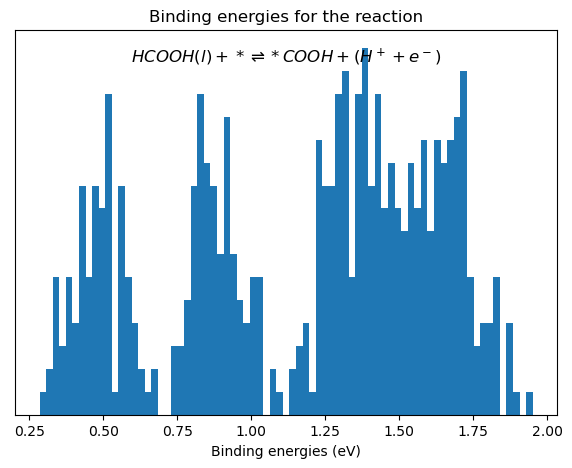

In [243]:
# I should make a plotting module that showcases a reaction
reaction_string = r"$HCOOH (l) + * \rightleftharpoons *COOH + (H^+ + e^-)$"

plot_BE(calibrated_binding_energies1, reaction_string)

### Loading binding energies of the reaction of formic acid turning into CO2
$$ *COOH \rightleftharpoons * + CO_2 (g) + (H^+ e^-) $$

In [244]:
products = {"CO2": molecules_dict["CO2"], "Slab": slab_energies}
reactants = {"bound_COOH": HEA_energies["COOH_C_adsorbed_out.db"]}

# Maybe I should make another entry with the amount of H+ + e- pairs produced

reaction2 = {"products": products, "reactants": reactants}

In [245]:
calibrated_binding_energies2 = binding_energy_reaction(reaction = reaction2, n_HE = 1, U = 0.0, AF = AF)

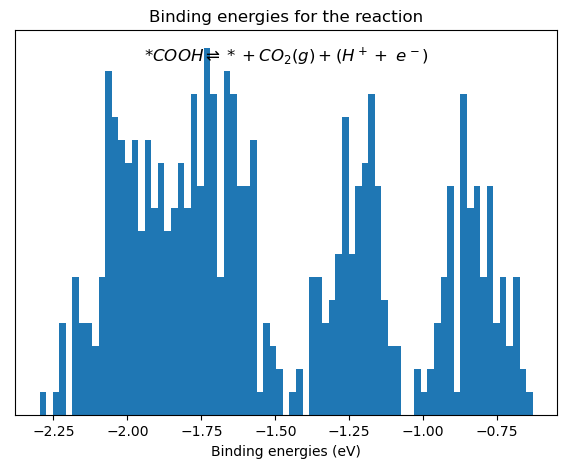

In [246]:
reaction_string = r"$*COOH \rightleftharpoons * + CO_2 (g) + (H^+ + e^-)$"
plot_BE(calibrated_binding_energies2, reaction_string)

### Reaction plots

In [ ]:
# FUNCTION
def free_e_diagram(reaction_strings, calibrated_binding_energies):
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    
    HE_steps = len(reaction_strings)
    for idx, energies in enumerate(calibrated_binding_energies):
        if idx == 0:
            alpha = 1.0
        else:
            alpha = 0.08
        ax.scatter([idx]*len(energies), energies, s=1000, marker = "_", alpha = alpha, label = reaction_strings[idx])
    
    ax.set_title(f"Two-step microkinetic model for the oxidation of formic acid")
    ax.set_xticks([num for num in range(HE_steps)], ["0"]+[f"+{num}"+r"$(H^++ e^-)$" for num in range(1, HE_steps)])
    ax.set_ylabel(r"$\Delta G$")
    #ax.set_xlabel("xlabel")
    ax.set_xlim(-0.2, HE_steps-1+0.2)
    leg = plt.legend()
    for lh in leg.legendHandles: 
        lh.set_alpha(1)
    #ax.legend()
    
    #plt.savefig("../figures/CV/combined_voltammogram.png", dpi = 300, bbox_inches = "tight")
    #fig.show()
    plt.show()

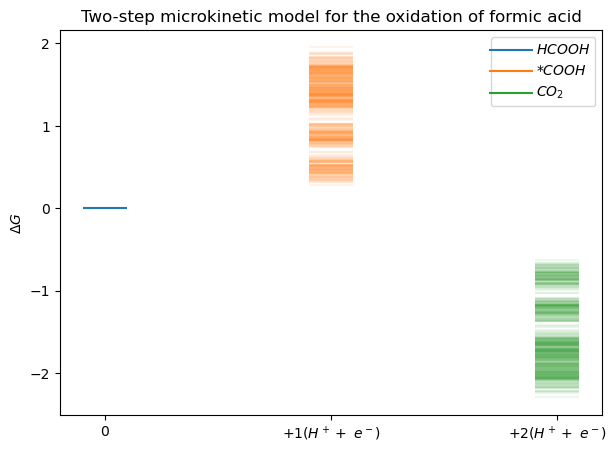

In [255]:
## TO DO:
# Horisontale histogrammer / Violin-plot?
# Loop til at plotte et vilkårligt antal reaktionstrin
# Lav et nice input format, som bliver unpacked i funktionen
# Sving fra træ til træ?

starting_string = r"$HCOOH$"
second_string = r"$*COOH$"
third_string = r"$CO_2$"
reaction_strings = [starting_string, second_string, third_string]
calibrated_binding_energies = [[0], calibrated_binding_energies1, calibrated_binding_energies2]

free_e_diagram(reaction_strings, calibrated_binding_energies)

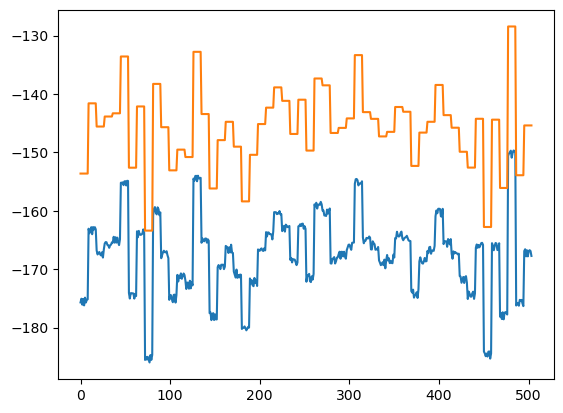

In [20]:
# The slab_energies and HEA energies match up! Yay!
plt.plot(HEA_energies["COOH_C_adsorbed_out.db"])
plt.plot(slab_energies)
plt.show()

### Plotting energies (No corrections)

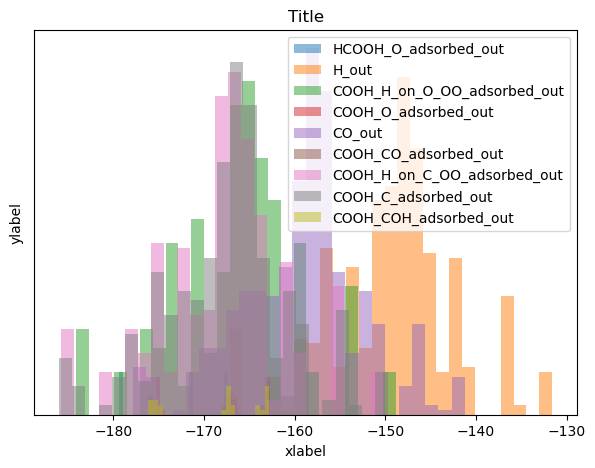

In [62]:
def plot_something(energy_dict):
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    
    for key in energy_dict.keys():
        if key  
        ax.hist(energy_dict[key], label = f"{key}"[:-3], bins=25, alpha = 0.5)
    
    ax.set_title(f"Title")
    ax.set_yticks([])
    ax.set_ylabel("ylabel")
    ax.set_xlabel("xlabel")
    ax.legend()
    #plt.savefig("../figures/CV/combined_voltammogram.png", dpi = 300, bbox_inches = "tight")
    #fig.show()
    plt.show()
    return None
    
plot_something(HEA_energies)

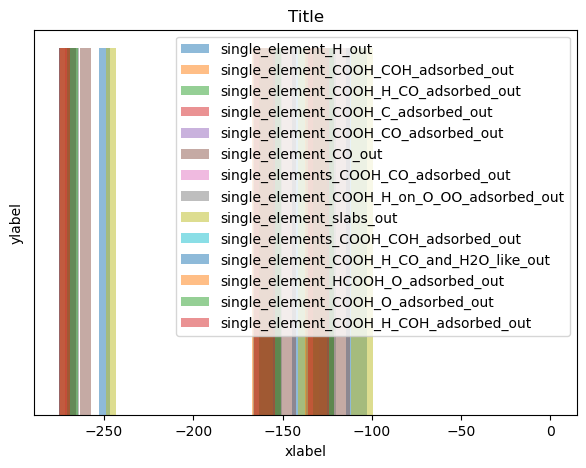

In [63]:
plot_something(SE_energies)

In [52]:
HEA_energies.keys()

dict_keys(['HCOOH_O_adsorbed_out.db', 'H_out.db', 'COOH_H_on_O_OO_adsorbed_out.db', 'COOH_O_adsorbed_out.db', 'CO_out.db', 'COOH_CO_adsorbed_out.db', 'COOH_H_on_C_OO_adsorbed_out.db', 'COOH_C_adsorbed_out.db', 'COOH_COH_adsorbed_out.db'])

### Fiddling with ase.db

In [48]:
Dbong = connect(formic_acid_data_path + HAE_dbs[0])
energy_list = []
for row in Dbong.select("energy"):
    print(row)
    energy_list.append(row.energy)

<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag13Au5Cu12Pd7Pt8CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag13Au5Cu12Pd7Pt8CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag13Au5Cu12Pd7Pt8CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag13Au5Cu12Pd7Pt8CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag13Au5Cu12Pd7Pt8CH2O2, keys=idx,slab_idx,site_id

In [40]:
Dbong = connect(formic_acid_data_path + HAE_dbs[0])
energy_list = []
for row in Dbong.select():
    #print(row.formula) #De keys man kan se med ase db er: id|age|user|formula|calculator|energy|natoms|fmax|pbc|volume|charge|mass|magmom
    print(Dbong.get_atoms(row.id))
    energy_list.append(row.energy)

Atoms(symbols='CuPdCuAuPdPt2CuAuPdAuPdPtPdAuAgPt2AuPtPdCuAgPd2AgPdPtAuCuPdAuAgPt2CuPdCuPtCuPtAgPdCu2OCOH2', pbc=[True, True, False], cell=[[8.231123626854087, 0.0, 0.0], [4.1155618134270435, 7.128362162545943, 0.0], [0.0, 0.0, 28.96091239802638]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), calculator=SinglePointCalculator(...))
Atoms(symbols='CuPdCuAuPdPt2CuAuPdAuPdPtPdAuAgPt2AuPtPdCuAgPd2AgPdPtAuCuPdAuAgPt2CuPdCuPtCuPtAgPdCu2OCOH2', pbc=[True, True, False], cell=[[8.231123626854087, 0.0, 0.0], [4.1155618134270435, 7.128362162545943, 0.0], [0.0, 0.0, 28.96091239802638]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), calculator=SinglePointCalculator(...))
Atoms(symbols='CuPdCuAuPdPt2CuAuPdAuPdPtPdAuAgPt2AuPtPdCuAgPd2AgPdPtAuCuPdAuAgPt2CuPdCuPtCuPtAgPdCu2OCOH2', pbc=[True, True, False], cell=[[8.231123

In [38]:
Dbong.get_atoms(2)

Atoms(symbols='CuPdCuAuPdPt2CuAuPdAuPdPtPdAuAgPt2AuPtPdCuAgPd2AgPdPtAuCuPdAuAgPt2CuPdCuPtCuPtAgPdCu2OCOH2', pbc=[True, True, False], cell=[[8.231123626854087, 0.0, 0.0], [4.1155618134270435, 7.128362162545943, 0.0], [0.0, 0.0, 28.96091239802638]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), calculator=SinglePointCalculator(...))

In [37]:
Dbong.get_atoms(2).cell

Cell([[8.231123626854087, 0.0, 0.0], [4.1155618134270435, 7.128362162545943, 0.0], [0.0, 0.0, 28.96091239802638]])

### Plotting template

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


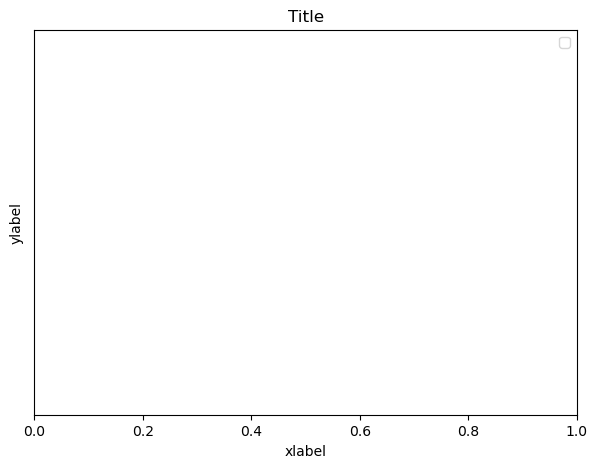

In [49]:
def plot_something():
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    
    ax.set_title(f"Title")
    ax.set_yticks([])
    ax.set_ylabel("ylabel")
    ax.set_xlabel("xlabel")
    ax.legend()
    #plt.savefig("../figures/CV/combined_voltammogram.png", dpi = 300, bbox_inches = "tight")
    #fig.show()
    plt.show()
    return None
    
plot_something()